# HR Analytics: Job Change of Data Scientists

# Data Visualization

## Modules

In [3]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [4]:
# display all the info in the column. Not to truncate the display.
pd.set_option('max_colwidth', None) 

In [5]:
# use ggplot in python
from plotnine import *

In [6]:
import os # Set the working directory
print (os.getcwd())

C:\Users\15177\Python_Project\HR_Analysis


In [7]:
import glob
import cv2 # pip install opencv-python
import ipyplot

## Data Loading

In [8]:
train= pd.read_csv('C:/Users/15177/Python_Project/HR_Analysis/Data/aug_train.csv')
print(train.columns)
print(train.shape)
train.head()

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')
(19158, 14)


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


# Organize features in this dataset
**Outcome** is target (categorical variable): 0 – Not looking for job change, 1 – Looking for a job change

**Continuous variables (cont)**: city_development_index, training_hours

**Categorical variables (cate)**: 

&nbsp;&nbsp; **Nominal cate**: gender, city, enrolled_university, company_type

&nbsp;&nbsp; **Ordinal cate**: relevent_experience, education_level, major_discipline, experience, company_size, last_new_job

# 1. Missing extent
Python Data Science Handbook by Jake VanderPlas [https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html]

In [9]:
n_stat = train.isnull().sum(axis=0)
n = n_stat.values.flatten()
p =(n / train.shape[0]).round(3)*100
d = {'features':n_stat.index, 'Missing Count': n, 'percentage': p}
tbl = pd.DataFrame(d) 
tbl.sort_values(by=['percentage'], ascending= False)

,features,Missing Count,percentage
10,company_type,6140,32.0
9,company_size,5938,31.0
3,gender,4508,23.5
7,major_discipline,2813,14.7
6,education_level,460,2.4
11,last_new_job,423,2.2
5,enrolled_university,386,2.0
8,experience,65,0.3
0,enrollee_id,0,0.0
1,city,0,0.0


<p> <b> <span style="color:red"> NOTE: Four of features have missing extent > 5%. </span> </b> </p>
We need to do imputation before using meaching learning. This will be done in another section - Data Preprocessing

# 2. Categorical Variables - Exploration

#### Define a function to do percentage

In [10]:
def f_percent(data, var_target ):

    df = data.copy()
    g = df[[var_target]]
    tbl = pd.concat([g.value_counts(), # Excludes NA values by default.
                     g.value_counts(normalize=True).mul(100).round(1)],
                     axis=1, keys=('counts','percentage')) 
    
    # row index to column
    tbl.reset_index(inplace=True)

    # Add a total.N
    tbl[['data_size']]= 'n=' + str(df.shape[0])
    
    # Long to wide
    df_wide = tbl.pivot(index='data_size', columns=var_target, values='percentage' )
    
    # Removing index
    df_wide= df_wide.rename_axis(index=None, columns=None)
    # print( 'The cell value is percentage' + '\n dim is' +  str(df_wide.shape) )
    
    return(df_wide)

In [11]:
# function test
f_percent(data=train, var_target = 'target')

,0.0,1.0
n=19158,75.1,24.9


### Quick Screening for the % of each class by categorical variable. 

In [12]:
class text:
   bold = '\033[1m'
   end= '\033[0m'

In [13]:
list_x = ['city', 'city_development_index', 'gender',
          'relevent_experience', 'enrolled_university', 'education_level',
          'major_discipline', 'experience', 'company_size', 'company_type',
           'last_new_job', 'target']

for x in list_x:
    df = f_percent(data=train, var_target = x)
    print('=============================================================='+'\n'+ 
           text.bold + x + text.end)
    print(df)

city
         city_1  city_10  city_100  city_101  city_102  city_103  city_104  \
n=19158     0.1      0.4       1.4       0.4       1.6      22.7       1.6   

         city_105  city_106  city_107  ...  city_84  city_89  city_9  city_90  \
n=19158       0.4       0.0       0.0  ...      0.1      0.3     0.1      1.0   

         city_91  city_93  city_94  city_97  city_98  city_99  
n=19158      0.2      0.1      0.1      0.5      0.4      0.5  

[1 rows x 123 columns]
city_development_index
         0.448  0.479  0.487  0.493  0.512  0.516  0.518  0.527  0.550  0.555  \
n=19158    0.1    0.1    0.0    0.1    0.0    0.1    0.0    0.5    1.3    0.3   

         ...  0.913  0.915  0.920  0.921  0.923  0.924  0.925  0.926  0.939  \
n=19158  ...    1.0    0.5   27.1    0.1    0.7    1.6    0.9    7.0    2.6   

         0.949  
n=19158    0.4  

[1 rows x 93 columns]
gender
         Female  Male  Other
n=19158     8.5  90.2    1.3
relevent_experience
         Has relevent experience  No

<p> <b> <span style="color:red"> NOTE: target (outcome) is imbalanced. </span> </b> </p>
It's recommended to do impute minor outcome. This will greatly increase model performance.  I will do this in the Section -  Data Preprocessing. Here is the [reference](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/).

# 3. Define Barplot for Data visualization 

After we convert the count into percentage. Then, Barplot is a great tool for presenting cateogrical data.

In [14]:
# A wrapper function
def f_stacked_barplot(data, var_target, var_group):
    #### Stratify dataset by the grouping variable
    g = data.groupby(var_group)
    df= pd.DataFrame()

    for label_g, df_g in g:
        tbl = f_percent(data= df_g, var_target= var_target)
        # Add group label at the 0-th column
        tbl.insert(loc=0, column='group_label', value= label_g)

        # Append panda rows
        df = pd.concat([df, tbl])

    #### Formate the output
    # row index to column
    df.reset_index(inplace=True)
    # Recreate a informative column with Group label and its size
    df['index'] =  df.agg(lambda x: f"{x['group_label']} \n {x['index']}", axis=1)
    #  Using set_index() method to convert 'index' column into index
    df= df.set_index('index') 
    # Remove multi-index 
    df= df.rename_axis(index=None, columns=None)
    
    #### Plot - horizontal Plot- df.plot.barh
    # Note: vertical bar plot - df.plot.bar
    df = df[[ 'group_label', 1.0 , 0.0 ]] # reorder  columns
    df.plot.barh(stacked=True, figsize=(5,5), color=('orange','grey')) 
    plt.xlabel('Percentage',size=13)
    plt.xticks(rotation=0, horizontalalignment="center")
    plt.legend(title = 'Looking for a job change',
                   title_fontsize=15, fontsize=15, 
                   bbox_to_anchor=(1.01, 1), 
                   loc='upper left', borderaxespad=0.0)
    plt.title(var_group)
    plt.gca().invert_yaxis()
    #### Output
    return(df)

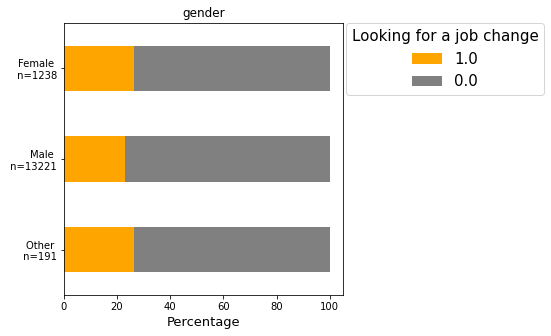

In [15]:
# test
df = f_stacked_barplot(data=train, var_target='target', var_group='gender' )

## Analyze the prevalence of outcome within a categorical variable
We care about the % of target(0/1) under a certain condition. If the % target(0/1) are obviously different across the levels, it is a sign that this continuous variable is associated with the target(0/1

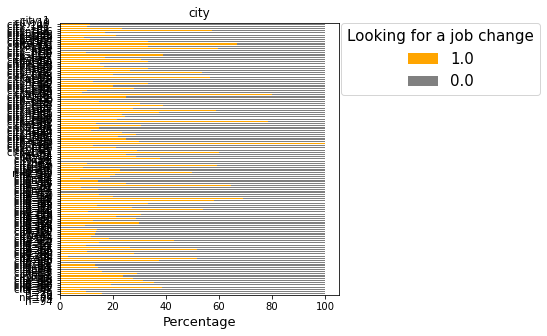

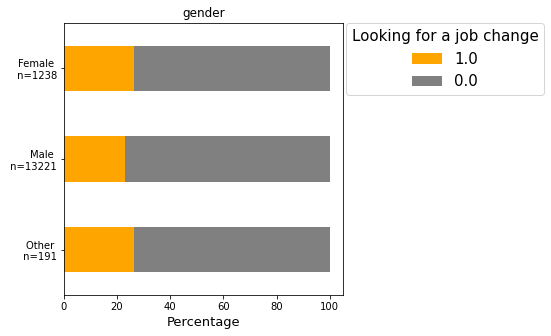

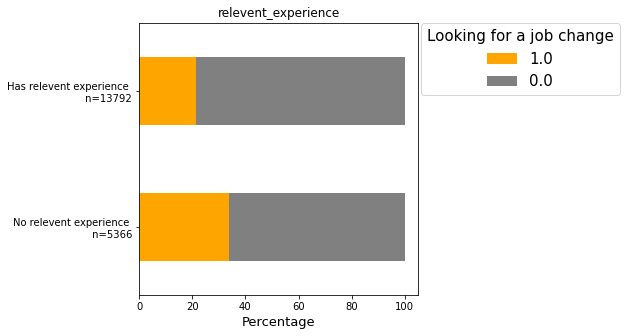

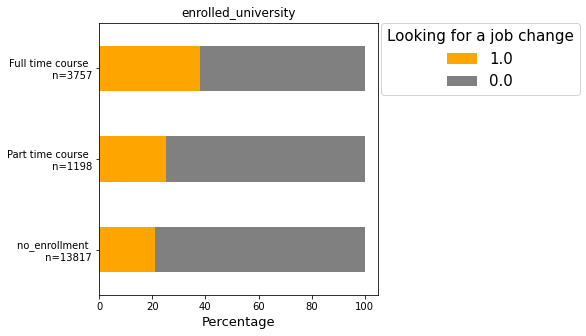

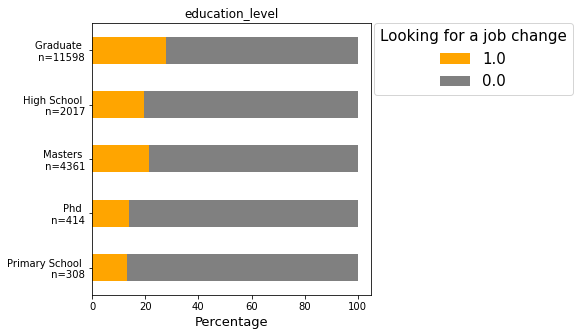

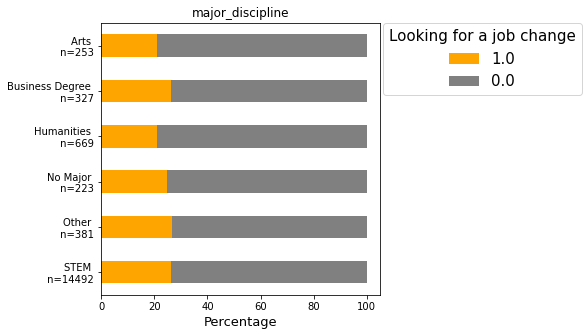

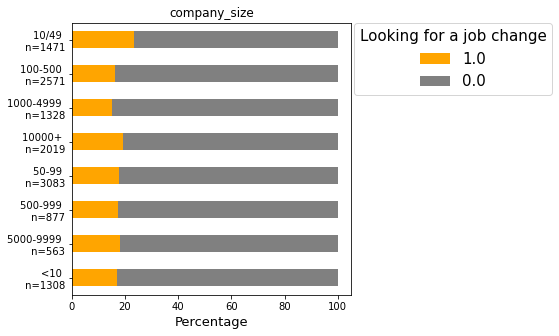

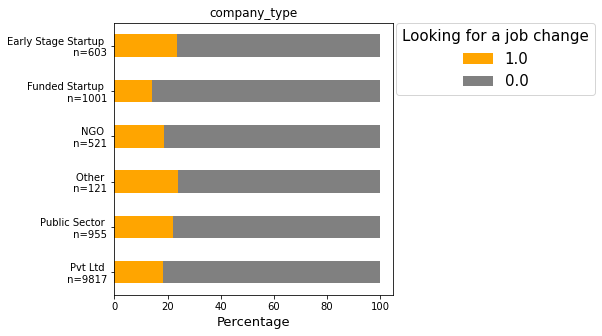

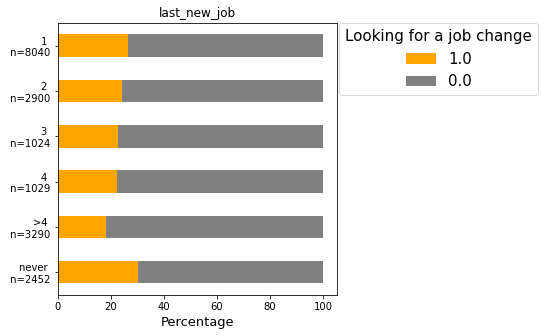

In [16]:
# Select the grouping vairable
list_grouping_var =['city',
                    'gender', 
                    'relevent_experience', 
                    'enrolled_university',
                    'education_level', 
                    'major_discipline', 
                    'company_size', 
                    'company_type',
                    'last_new_job']

# Use for-Loop to explore the data
for x in list_grouping_var:
    df = f_stacked_barplot(data=train,var_target='target', var_group= x )

Gender has a weak association with the outcome.
<p> <b> <span style="color:red"> City, Relevant experience of candidate, Enrolled_university </span> </b>  have strong association with the outcome (looking for a job change). </p>
Other than that, we can see that at leaset one to two class in a categorical variable have effect on the outcome.

**For example:**
1. People with Graduate Degree tend to look for a job change.
2. People in Art industry is less likely to look for a job change.
3. People in Early Start up tend tend to look for job change.
4. People who never change a job is highly looking for a job change. 

<p> <b> <span style="color:blue"> The tendency to look for a job is decreasing if people stay in the same job for a longer time. </span> </b> 

#  4. Convert continuous variable into categorical type.


Continuous variables (cont): city_development_index, training_hours

In [17]:
# check the summary statistics

train.agg(
 { 'city_development_index':["min", "max", "median", "mean"],
    'training_hours':["min", "max", "median", "mean"],
 }
)

,city_development_index,training_hours
min,0.448000,1.000000
max,0.949000,336.000000
median,0.903000,47.000000
mean,0.828848,65.366896


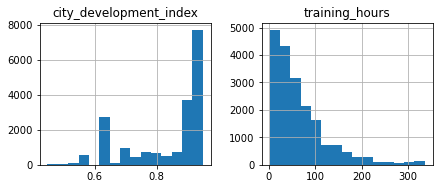

In [18]:
numerical= ['city_development_index', 'training_hours']
train[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4));

**4.1 city_development_index**

<p> <b> <span style="color:red"> People in city_dev_1 (dev index < 0.6)  </span> </b>  are more likely to look for a job change. </p>

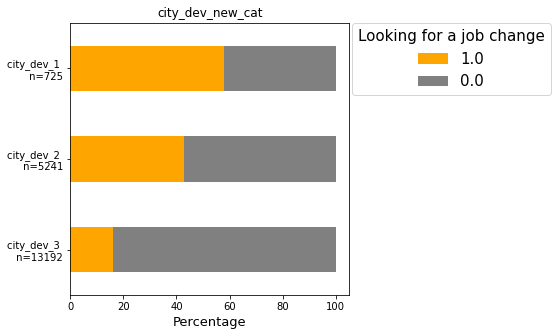

In [19]:
train['city_dev_new_cat'] = pd.cut(train.city_development_index,bins=[0.4, 0.6, 0.8, 1],
       labels=['city_dev_1','city_dev_2','city_dev_3'])

df = f_stacked_barplot(data=train,var_target='target', var_group='city_dev_new_cat' )

**4.2 training_hours**

Training hour is not strongly associated with the outcome of looking for a job change.

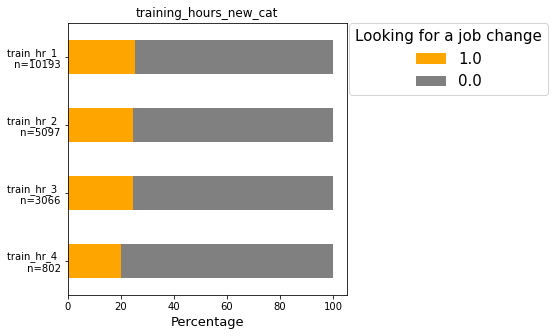

In [20]:
train['training_hours_new_cat'] = pd.cut(train.training_hours, bins=[0, 50, 100, 200, 350],
       labels=['train_hr_1','train_hr_2','train_hr_3','train_hr_4'])

df = f_stacked_barplot(data=train,var_target='target', var_group='training_hours_new_cat' )

# 5. Summary

This section is to use data visualization to gain the insights on the factors which affect the status of looking for a job change. 

**Four factors are relatively important:**

1. City
2. City development index
2. Relevant experience of candidate
3. The type of Enrolled University

# End